In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import oneDInteraction as od

In [16]:
from importlib import reload

In [33]:
od =reload(od)

In [47]:
params_0 = {'R':1.0,
            'b':0.01,
            'fraction_A':0.01,
            'fraction_B':0.01,
            'spherical':True,
            'rbind':0.03,
            'ubind':0.0,
            'chi_aa':-0.005,
            'chi_pp':0.01,
            'equ_of_state':'FloryHuggins',
            'reverse_x':True}

In [69]:
params_0['fractional_update']=0.02
params_0['cycles']=200
params_0['tolerence']=0.003

In [72]:
delta_params={'ubind':0.002}
n_samples = 200

In [73]:
[xpts, samples] = od.progression(params_0,delta_params,n_samples)

Takeing sameple  0  ...


/home/users/qmac/SCFT/oneDInteraction.py:291: UserWarning: Failed to converge error metric = 0.008185184480132796
  warnings.warn("Failed to converge error metric = "+str(error))


Takeing sameple  1  ...
Takeing sameple  2  ...
Takeing sameple  3  ...
Takeing sameple  4  ...
Takeing sameple  5  ...
Takeing sameple  6  ...
Takeing sameple  7  ...
Takeing sameple  8  ...
Takeing sameple  9  ...
Takeing sameple  10  ...
Takeing sameple  11  ...
Takeing sameple  12  ...
Takeing sameple  13  ...
Takeing sameple  14  ...
Takeing sameple  15  ...
Takeing sameple  16  ...
Takeing sameple  17  ...
Takeing sameple  18  ...
Takeing sameple  19  ...
Takeing sameple  20  ...
Takeing sameple  21  ...
Takeing sameple  22  ...
Takeing sameple  23  ...
Takeing sameple  24  ...
Takeing sameple  25  ...
Takeing sameple  26  ...
Takeing sameple  27  ...
Takeing sameple  28  ...
Takeing sameple  29  ...
Takeing sameple  30  ...
Takeing sameple  31  ...
Takeing sameple  32  ...
Takeing sameple  33  ...
Takeing sameple  34  ...
Takeing sameple  35  ...
Takeing sameple  36  ...
Takeing sameple  37  ...
Takeing sameple  38  ...
Takeing sameple  39  ...
Takeing sameple  40  ...
Takeing s

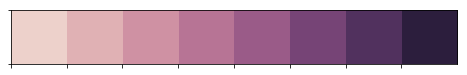

In [67]:
sns.palplot(sns.cubehelix_palette(8))

In [74]:
samples[-1]['ubind']

0.398

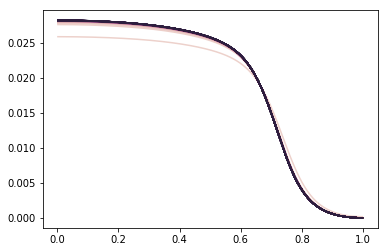

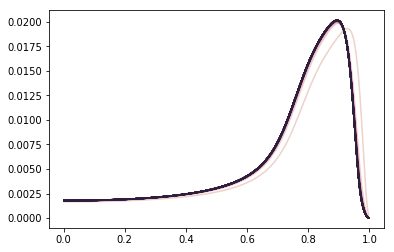

In [68]:
colors = sns.cubehelix_palette(len(samples))
for i_sample, sample in enumerate(samples):
    plt.plot(xpts,sample['phi_a'],color=colors[i_sample])
    #plt.ylim((0,0.1))
plt.show()
for i_sample, sample in enumerate(samples):
    plt.plot(xpts,sample['phi_b'],color=colors[i_sample])
    #plt.ylim((0,0.1))
plt.show()

In [54]:
parameters = {'R':1.0,
             'b':0.01,
             'basis_size':150,
             'nxpts':450,
             'fraction_A':0.01,
             'fraction_B':0.01,
             'fractional_update':0.02,
             'accelerate_level':0.05,
             'accelerated_update':0.05,
             'spherical':True,
             'tolerence':0.005}
u_constants = {'rbind':0.03,
              'ubind':-0.00,
              'chi_aa':-0.007,
              'chi_pp':0.01,
              'equ_of_state':'FloryHuggins',
              'reverse_x':True}

In [45]:
[xpts, history] = od.iterate(u_constants, **parameters)

/home/users/qmac/SCFT/oneDInteraction.py:291: UserWarning: Failed to converge error metric = 0.05896274373597067
  warnings.warn("Failed to converge error metric = "+str(error))


In [ ]:
import cProfile
cProfile.run('od.iterate(u_constants, **parameters)')

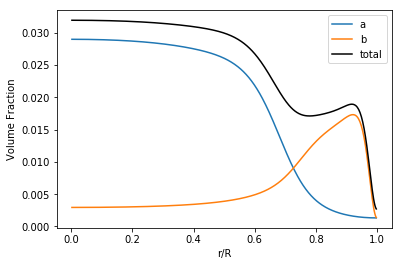

In [46]:
plt.plot(xpts,history[-1]['phi_a'],label='a')
plt.plot(xpts,history[-1]['phi_b'],label='b')
plt.plot(xpts,history[-1]['phi_a']+history[-1]['phi_b'],label='total',color='k')
plt.ylabel('Volume Fraction')
plt.xlabel('r/R')
plt.legend()
plt.show()

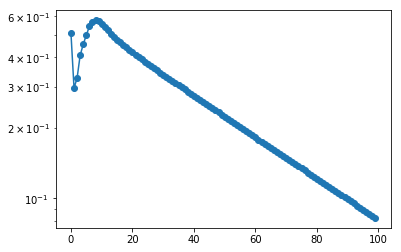

In [38]:
errors = []
for m in range(len(history)):
    errors.append(history[m]['error'])
plt.plot(np.arange(len(history)),errors,'-o')
plt.yscale('log')
#plt.ylim([0.00001,1])

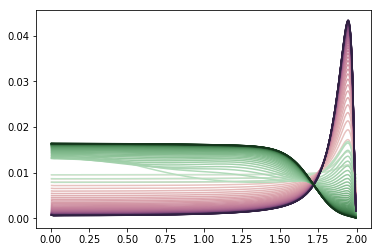

In [79]:
colors = sns.cubehelix_palette(len(history))
colors_b = sns.cubehelix_palette(len(history),start=2,rot=0)
for m in range(0,len(history),2):
    plt.plot(xpts,history[m]['phi_a'],color=colors[m])
    plt.plot(xpts,history[m]['phi_b'],color=colors_b[m])
plt.show()

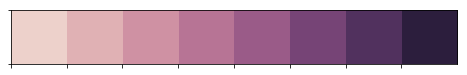

In [13]:
sns.palplot(sns.cubehelix_palette(8))

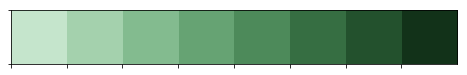

In [284]:
sns.palplot(sns.cubehelix_palette(8,start=2,rot=0))

In [172]:
import time

In [164]:
M=history[-1]['M_a']
M.shape

TypeError: 'module' object is not callable

In [177]:
start = time.time()
for _ in range(100):
    v=od.sorted_eig(M, top=True, power_iteration=True, tol=10**(-10))
end = time.time()
print(end-start)

5.6135077476501465


In [174]:
start = time.time()
for _ in range(100):
    v=od.sorted_eig(M, top=True, power_iteration=False, tol=10**(-14))
end = time.time()
print(end-start)

3.0962798595428467
